# Lab 5, Fully Connected Neural Networks, By Shawn Nassabi

In [2]:
from sklearn.datasets import load_digits #import the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
print("Done")

Done


## Loading, visualizing, scaling dataset, and splitting dataset into train test splits:

In [15]:
digits = load_digits()
X = digits.data
Y = digits.target.reshape(-1,1)
print(X.shape)
print(Y.shape)

(1797, 64)
(1797, 1)


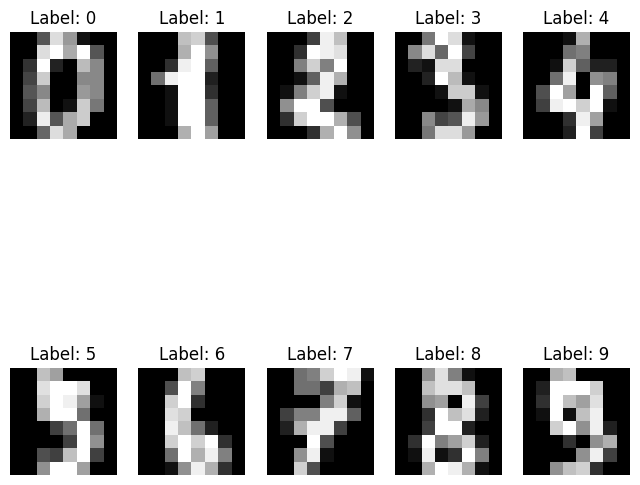

In [22]:
# Visualize some sample images
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {Y[i][0]}")
    plt.axis('off')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# For normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(X_train.shape) 
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1437, 64)
(360, 64)
(1437, 1)
(360, 1)


## One hot encoding to targets:

In [27]:
def one_hot_encoding(labels, num_classes):
    length = len(labels)
    array = np.zeros((length, num_classes))
    for i, l in enumerate(labels):
        array[i, l] = 1
    return array
# One hot encoded Y labels:
Y_train_onehot = one_hot_encoding(Y_train, 10)
Y_test_onehot = one_hot_encoding(Y_test, 10)
print(Y_train_onehot.shape)
print(Y_test_onehot.shape)

(1437, 10)
(360, 10)


## Neural Network with Relu:

In [41]:
class NeuralNetwork_Relu:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(42)
        # Initialize weights with random values from a normal distribution
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        # Initialize biases to zeros
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        

    # Relu activation function
    def relu(self, input):
        A = np.maximum(0,input)
        return A

    def relu_deriv(self, input):
        dZ = np.where(input > 0, 1, 0)
        return dZ

    def forward_pass(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)

        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.relu(Z2)

        return Z1, A1, Z2, A2

    def backward_pass(self, X, Y, Z1, A1, Z2, A2, lRate):

        m = X.shape[0]
        
        # Update W2
        dE_dYhat = 2*(A2 - Y)
        dYhat_dZ2 = self.relu_deriv(Z2)
        dZ2 = dE_dYhat * dYhat_dZ2
        dW2 = np.dot(A1.T, dZ2) / m

        self.W2 -= lRate * dW2

        # Update b2 TODO
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        self.b2 -= lRate * db2 

        # Update W1
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_deriv(Z1)
        dW1 = np.dot(X.T, dZ1) / m

        self.W1 -= lRate * dW1

        # Update b1
        #db1 = np.dot((np.dot(dE_dYhat, dYhat_dZ2) @ self.W2.T), self.relu_deriv(self.Z1))
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.b1 -= lRate * db1

        
    def train(self, X, Y, lRate, epochs):
        for e in range(epochs):
            Z1, A1, Z2, A2 = self.forward_pass(X)
            self.backward_pass(X, Y, Z1, A1, Z2, A2, lRate)

    def predict(self, X_test):
        Z1, A1, Z2, A2 = self.forward_pass(X_test)
        return A2

    def get_loss(self, A2, Y):
        m = Y.shape[0]
        loss = np.sum((A2 - Y) ** 2) / (2 * m)
        return loss
        

In [42]:
NN = NeuralNetwork_Relu(64, 30, 10)

In [90]:
LRATE = 0.02
EPOCHS = 500

NN.train(X_train, Y_train_onehot, LRATE, EPOCHS)
print("Done")

Done


In [91]:
predictions = NN.predict(X_test)
test_loss = NN.get_loss(predictions, Y_test_onehot)
print("Test loss:", test_loss)

Test loss: 0.09062281049674714


## Neural Network with Sigmoid:

In [58]:
class NeuralNetwork_Sigmoid:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(42)
        # Initialize weights with random values from a normal distribution
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        # Initialize biases to zeros
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        

    # Sigmoid activation function
    def sigmoid(self, input):
        return 1 / (1 + np.exp(-input))

    def sigmoid_deriv(self, input):
        return input * (1 - input)

    def forward_pass(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)

        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)

        return Z1, A1, Z2, A2

    def backward_pass(self, X, Y, Z1, A1, Z2, A2, lRate):

        m = X.shape[0]
        
        # Update W2
        dE_dYhat = 2*(A2 - Y)
        dYhat_dZ2 = self.sigmoid_deriv(Z2)
        dZ2 = dE_dYhat * dYhat_dZ2
        dW2 = np.dot(A1.T, dZ2) / m

        self.W2 -= lRate * dW2

        # Update b2 TODO
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        self.b2 -= lRate * db2 

        # Update W1
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_deriv(Z1)
        dW1 = np.dot(X.T, dZ1) / m

        self.W1 -= lRate * dW1

        # Update b1
        #db1 = np.dot((np.dot(dE_dYhat, dYhat_dZ2) @ self.W2.T), self.relu_deriv(self.Z1))
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.b1 -= lRate * db1

        
    def train(self, X, Y, lRate, epochs):
        for e in range(epochs):
            Z1, A1, Z2, A2 = self.forward_pass(X)
            self.backward_pass(X, Y, Z1, A1, Z2, A2, lRate)

    def predict(self, X_test):
        Z1, A1, Z2, A2 = self.forward_pass(X_test)
        return A2

    def get_loss(self, A2, Y):
        m = Y.shape[0]
        loss = np.sum((A2 - Y) ** 2) / (2 * m)
        return loss
        

In [68]:
NN = NeuralNetwork_Sigmoid(64, 30, 10)
LRATE = 0.02
EPOCHS = 1000

NN.train(X_train, Y_train_onehot, LRATE, EPOCHS)
print("Done")

Done


In [69]:
predictions = NN.predict(X_test)
test_loss = NN.get_loss(predictions, Y_test_onehot)
print("Test loss:", test_loss)

Test loss: 1.249971903050273


## Neural Network with Tanh:

In [64]:
class NeuralNetwork_Tanh:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(42)
        # Initialize weights with random values from a normal distribution
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        # Initialize biases to zeros
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        

    # Tanh activation function
    def tanh(self, input):
        return np.tanh(input)

    def tanh_deriv(self, input):
        return 1 - np.square(np.tanh(input))

    def forward_pass(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.tanh(Z1)

        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.tanh(Z2)

        return Z1, A1, Z2, A2

    def backward_pass(self, X, Y, Z1, A1, Z2, A2, lRate):

        m = X.shape[0]
        
        # Update W2
        dE_dYhat = 2*(A2 - Y)
        dYhat_dZ2 = self.tanh_deriv(Z2)
        dZ2 = dE_dYhat * dYhat_dZ2
        dW2 = np.dot(A1.T, dZ2) / m

        self.W2 -= lRate * dW2

        # Update b2 TODO
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        self.b2 -= lRate * db2 

        # Update W1
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.tanh_deriv(Z1)
        dW1 = np.dot(X.T, dZ1) / m

        self.W1 -= lRate * dW1

        # Update b1
        #db1 = np.dot((np.dot(dE_dYhat, dYhat_dZ2) @ self.W2.T), self.relu_deriv(self.Z1))
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.b1 -= lRate * db1

        
    def train(self, X, Y, lRate, epochs):
        for e in range(epochs):
            Z1, A1, Z2, A2 = self.forward_pass(X)
            self.backward_pass(X, Y, Z1, A1, Z2, A2, lRate)

    def predict(self, X_test):
        Z1, A1, Z2, A2 = self.forward_pass(X_test)
        return A2

    def get_loss(self, A2, Y):
        m = Y.shape[0]
        loss = np.sum((A2 - Y) ** 2) / (2 * m)
        return loss
        

In [70]:
NN = NeuralNetwork_Tanh(64, 30, 10)
LRATE = 0.02
EPOCHS = 1000

NN.train(X_train, Y_train_onehot, LRATE, EPOCHS)
print("Done")

Done


In [71]:
predictions = NN.predict(X_test)
test_loss = NN.get_loss(predictions, Y_test_onehot)
print("Test loss:", test_loss)

Test loss: 0.17659693967753934
